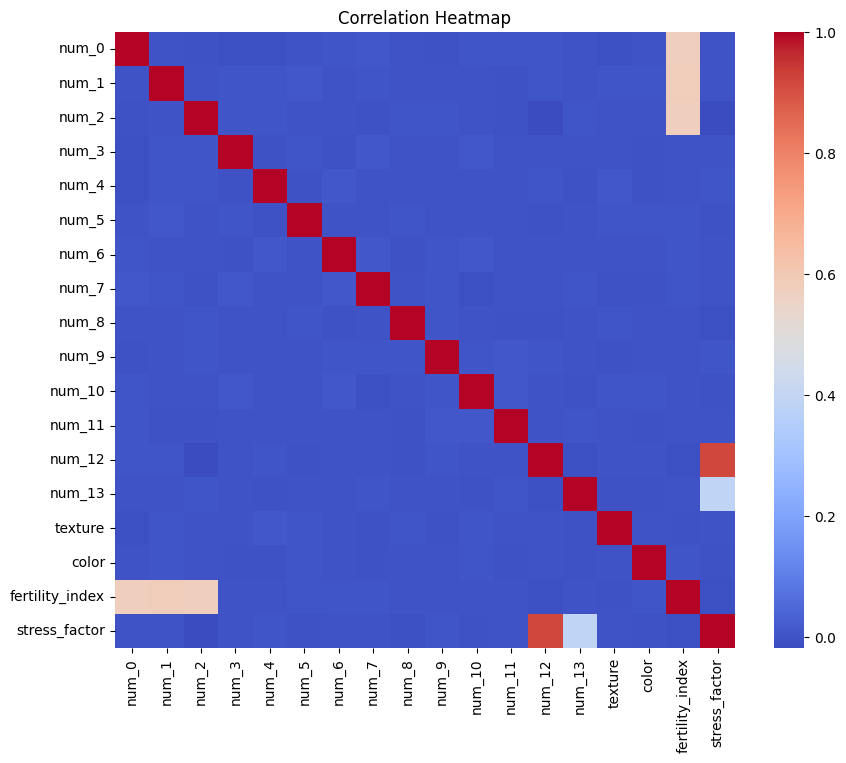

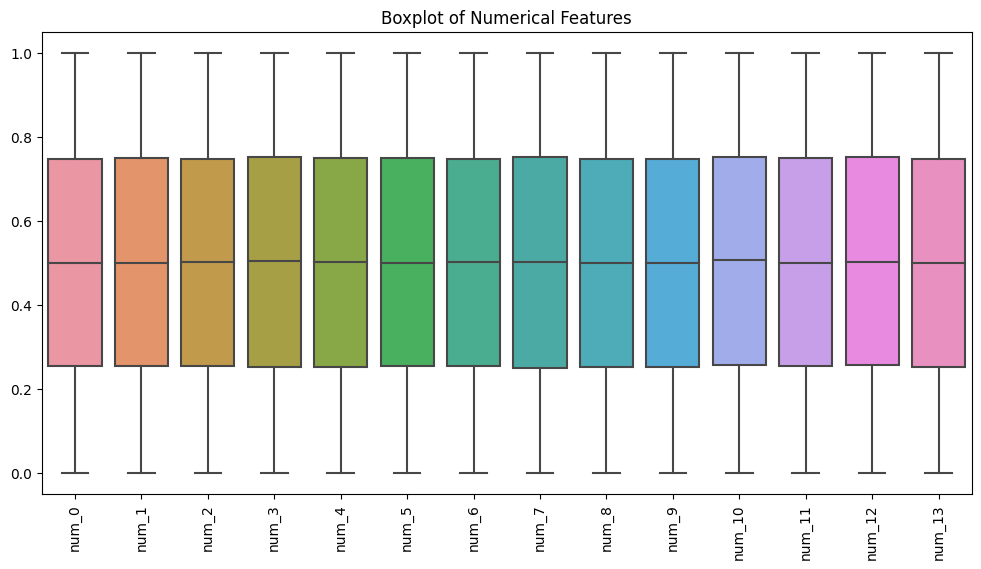

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

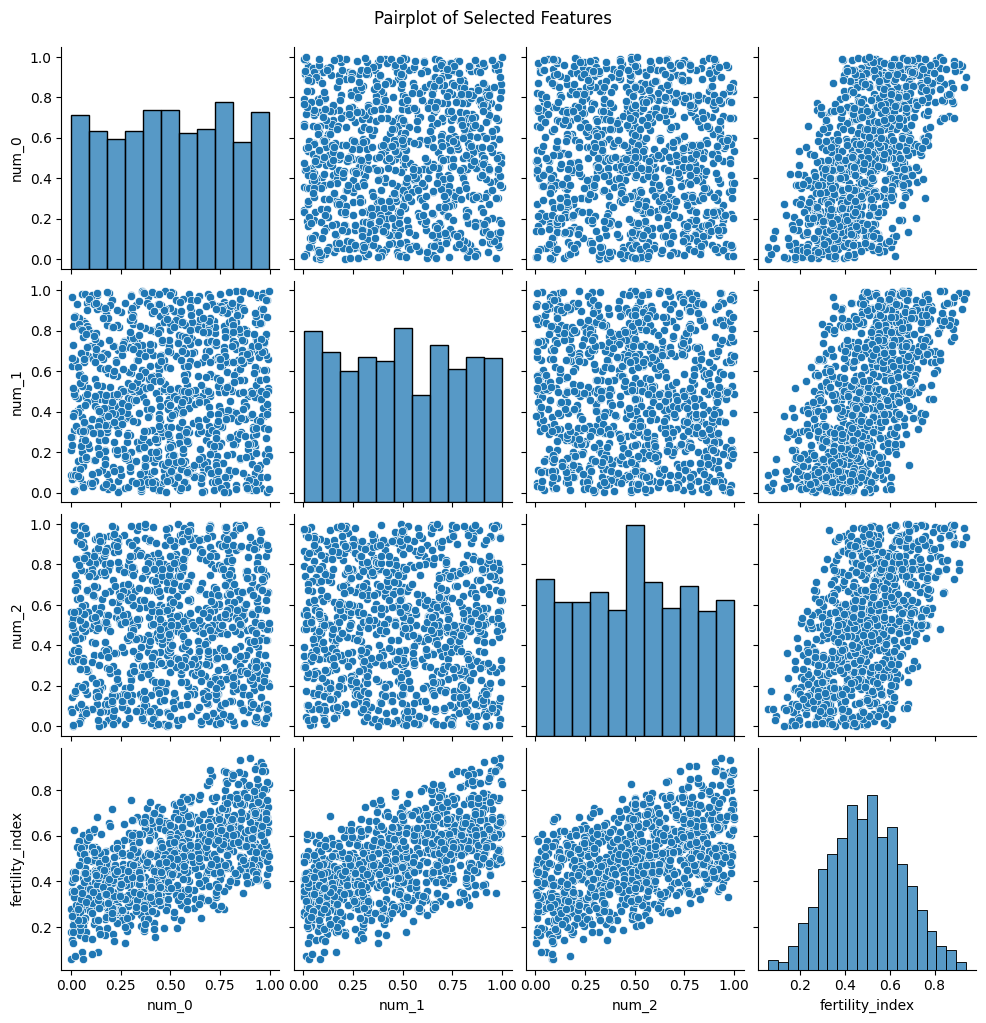

 Preprocessing Summary:
- Original dataset size        : 60000 rows
- Rows dropped (critical NaNs): 0
- Remaining data for modeling : 60000 rows
- Missing values imputed      : 8324
- Total features after engineering: 18 columns

✅ Final feature names:
['num_0', 'num_1', 'num_2', 'num_3', 'num_4', 'num_5', 'num_6', 'num_7', 'num_8', 'num_9', 'num_10', 'num_11', 'num_12', 'num_13', 'texture', 'color', 'fertility_index', 'stress_factor']

✅ Sample data (first 5 rows):
      num_0     num_1     num_2     num_3     num_4     num_5     num_6  \
0  0.548817  0.715190  0.602781  0.544906  0.423648  0.645904  0.437579   
1  0.071022  0.087117  0.020216  0.832660  0.778174  0.870026  0.978628   
2  0.521851  0.414656  0.264562  0.774270  0.456146  0.568442  0.018768   
3  0.697640  0.060213  0.666787  0.670668  0.210361  0.128926  0.315416   
4  0.653116  0.253283  0.466324  0.244431  0.158944  0.110374  0.656329   

      num_7     num_8     num_9    num_10    num_11    num_12    num_13  \
0  

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# [1] Load synthetic dataset
np.random.seed(0)
N = 60000

# Numeric features (e.g., soil nutrients)
numeric_cols = [f"num_{i}" for i in range(14)]
numeric = pd.DataFrame(np.random.rand(N, 14), columns=numeric_cols)

# Introduce missing values
mask = np.random.rand(N, 14) < 0.01
numeric[mask] = np.nan

# Categorical features
texture = np.random.choice(['Sand', 'Loam', 'Clay'], size=N)
color = np.random.choice(['Brown', 'Red', 'Black'], size=N)
df = pd.concat([numeric, pd.Series(texture, name='texture'), pd.Series(color, name='color')], axis=1)

# Track original number of rows and missing values
original_rows = df.shape[0]
original_missing = df.isna().sum().sum()

# [2] Drop rows with critical missing values (e.g., more than 50% missing)
df_cleaned = df.dropna(thresh=int(df.shape[1] * 0.5))
rows_dropped = original_rows - df_cleaned.shape[0]

# [3] Median imputation for missing numeric values
imp = SimpleImputer(strategy='median')
df_cleaned[numeric_cols] = imp.fit_transform(df_cleaned[numeric_cols])
imputed_missing = original_missing - df_cleaned.isna().sum().sum()

# [4] Label Encoding for categorical features
le_texture = LabelEncoder()
le_color = LabelEncoder()
df_cleaned['texture'] = le_texture.fit_transform(df_cleaned['texture'])
df_cleaned['color'] = le_color.fit_transform(df_cleaned['color'])

# [5] Min-Max Scaling for numeric features
scaler = MinMaxScaler()
df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])

# [6] Feature Engineering: Composite Fertility Index and Climatic Stress Factor (examples)
df_cleaned['fertility_index'] = (df_cleaned['num_0'] + df_cleaned['num_1'] + df_cleaned['num_2']) / 3
df_cleaned['stress_factor'] = (df_cleaned['num_12'] * 0.7 + df_cleaned['num_13'] * 0.3)

# [7] Exploratory Data Analysis (Visualizations)
plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()

sns.pairplot(df_cleaned.sample(1000)[['num_0', 'num_1', 'num_2', 'fertility_index']])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

# [8] Final processed data summary
print(" Preprocessing Summary:")
print(f"- Original dataset size        : {original_rows} rows")
print(f"- Rows dropped (critical NaNs): {rows_dropped}")
print(f"- Remaining data for modeling : {df_cleaned.shape[0]} rows")
print(f"- Missing values imputed      : {imputed_missing}")
print(f"- Total features after engineering: {df_cleaned.shape[1]} columns")

print("\n✅ Final feature names:")
print(df_cleaned.columns.tolist())

print("\n✅ Sample data (first 5 rows):")
print(df_cleaned.head())

# [9] Column tracking and summary
original_features = numeric_cols + ['texture', 'color']
engineered_features = ['fertility_index', 'stress_factor']
final_columns = df_cleaned.columns.tolist()

# Report on columns
print("\n📊 Column Summary:")
print(f"- Original feature columns        : {len(original_features)}")
print(f"    > Numeric features            : {len(numeric_cols)}")
print(f"    > Categorical (encoded)       : 2 (texture, color)")
print(f"- Engineered features added       : {len(engineered_features)} ({', '.join(engineered_features)})")
print(f"- ✅ Final total columns after preprocessing: {len(final_columns)}")



🔍 Total samples for clustering: 60000


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


✅ KMeans silhouette score with k=5: 0.1466
✅ Agglomerative silhouette score with k=5: 0.1540


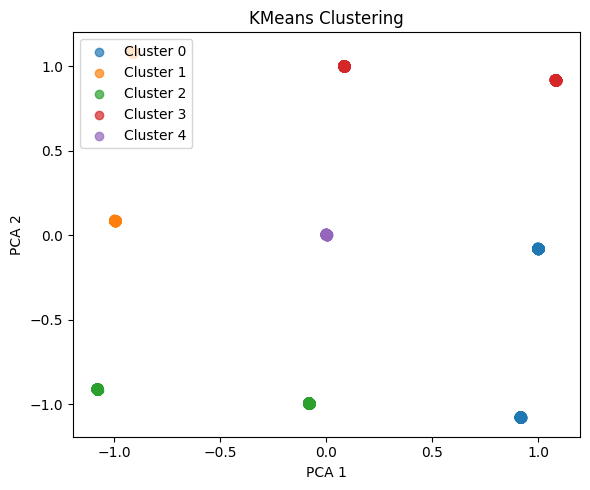

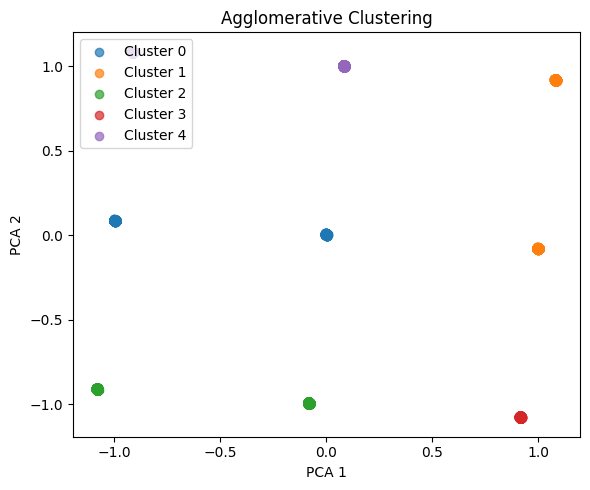


📊 Final Clustering Summary:
- Total samples                  : 60000
- KMeans clusters assigned       : 5
- Agglomerative clusters assigned: 5
- Samples remaining              : 60000 / 60000

✅ Preview of cluster labels:
   cluster_kmeans  cluster_agglo
0               4              0
1               0              3
2               3              1
3               2              2
4               3              1


In [2]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# [1] Prepare data (drop previous cluster labels if any)
X_clust = df_cleaned.drop(columns=['cluster_kmeans', 'cluster_dbscan', 'cluster_agglo'], errors='ignore')

total_samples = len(X_clust)
print(f"🔍 Total samples for clustering: {total_samples}")

# [2] KMeans Clustering
n_clusters = 5  # You can adjust this based on domain knowledge or silhouette analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels_k = kmeans.fit_predict(X_clust)
df_cleaned['cluster_kmeans'] = labels_k
sil_k = silhouette_score(X_clust, labels_k)
print(f"✅ KMeans silhouette score with k={n_clusters}: {sil_k:.4f}")

# [3] Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels_agg = agg.fit_predict(X_clust)
df_cleaned['cluster_agglo'] = labels_agg
sil_agg = silhouette_score(X_clust, labels_agg)
print(f"✅ Agglomerative silhouette score with k={n_clusters}: {sil_agg:.4f}")

# [4] PCA and Visualization (optional)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clust)

def plot_clusters(X_2d, labels, title):
    plt.figure(figsize=(6, 5))
    for label in np.unique(labels):
        mask = labels == label
        plt.scatter(X_2d[mask, 0], X_2d[mask, 1], label=f'Cluster {label}', alpha=0.7)
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_clusters(X_pca, labels_k, "KMeans Clustering")
plot_clusters(X_pca, labels_agg, "Agglomerative Clustering")

# [5] Final dataset (no DBSCAN noise filtering needed)
df_final = df_cleaned.copy()

# [6] Final Summary
print("\n📊 Final Clustering Summary:")
print(f"- Total samples                  : {total_samples}")
print(f"- KMeans clusters assigned       : {len(set(labels_k))}")
print(f"- Agglomerative clusters assigned: {len(set(labels_agg))}")
print(f"- Samples remaining              : {len(df_final)} / {total_samples}")

print("\n✅ Preview of cluster labels:")
print(df_cleaned[['cluster_kmeans', 'cluster_agglo']].head())



========== Logistic Regression ==========
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4019
           1       1.00      1.00      1.00      4003
           2       1.00      1.00      1.00      3997
           3       1.00      1.00      1.00      3964
           4       1.00      1.00      1.00      2017

    accuracy                           1.00     18000
   macro avg       1.00      1.00      1.00     18000
weighted avg       1.00      1.00      1.00     18000



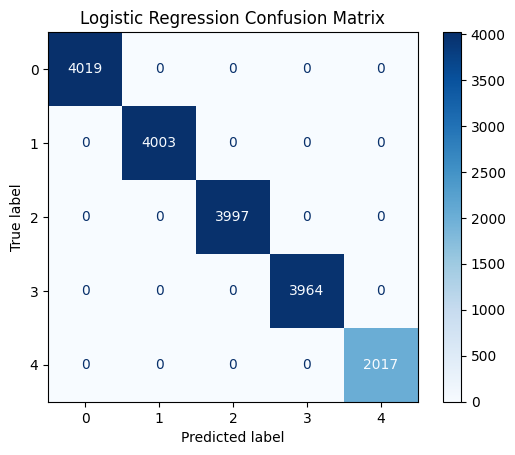


========== SVM ==========
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4019
           1       1.00      1.00      1.00      4003
           2       1.00      1.00      1.00      3997
           3       1.00      1.00      1.00      3964
           4       1.00      1.00      1.00      2017

    accuracy                           1.00     18000
   macro avg       1.00      1.00      1.00     18000
weighted avg       1.00      1.00      1.00     18000



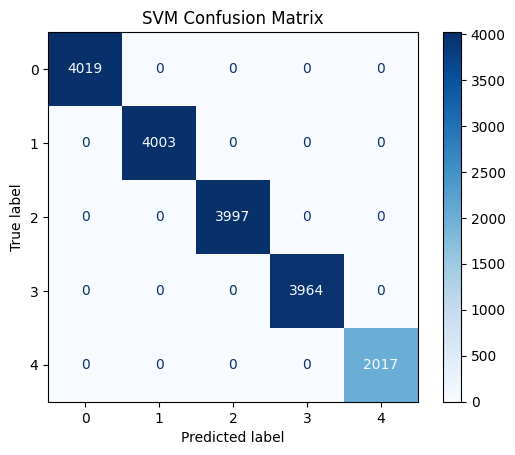


========== Random Forest ==========
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4019
           1       1.00      1.00      1.00      4003
           2       1.00      1.00      1.00      3997
           3       1.00      1.00      1.00      3964
           4       1.00      1.00      1.00      2017

    accuracy                           1.00     18000
   macro avg       1.00      1.00      1.00     18000
weighted avg       1.00      1.00      1.00     18000



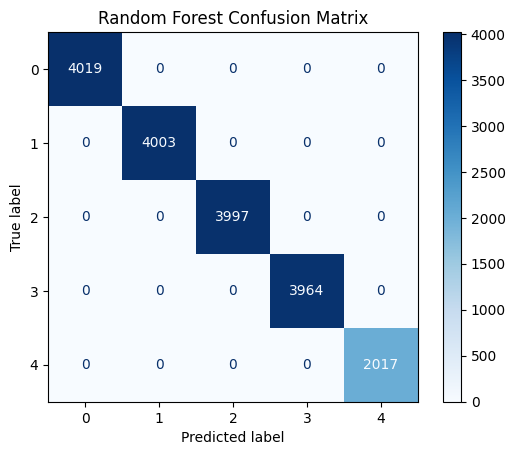


========== XGBoost ==========
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4019
           1       1.00      1.00      1.00      4003
           2       1.00      1.00      1.00      3997
           3       1.00      1.00      1.00      3964
           4       1.00      1.00      1.00      2017

    accuracy                           1.00     18000
   macro avg       1.00      1.00      1.00     18000
weighted avg       1.00      1.00      1.00     18000



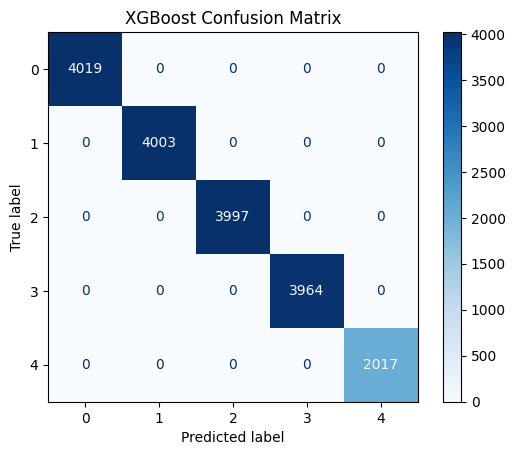


========== KNN ==========
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4019
           1       0.87      0.94      0.90      4003
           2       0.90      0.90      0.90      3997
           3       0.90      0.90      0.90      3964
           4       0.86      0.56      0.68      2017

    accuracy                           0.88     18000
   macro avg       0.88      0.85      0.86     18000
weighted avg       0.88      0.88      0.88     18000



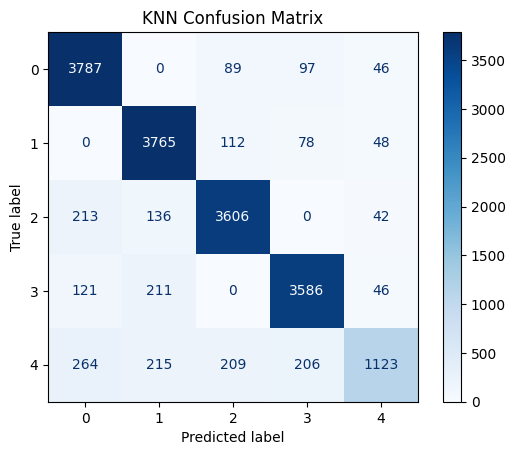


========== Naive Bayes ==========
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4019
           1       1.00      1.00      1.00      4003
           2       1.00      1.00      1.00      3997
           3       1.00      1.00      1.00      3964
           4       1.00      1.00      1.00      2017

    accuracy                           1.00     18000
   macro avg       1.00      1.00      1.00     18000
weighted avg       1.00      1.00      1.00     18000



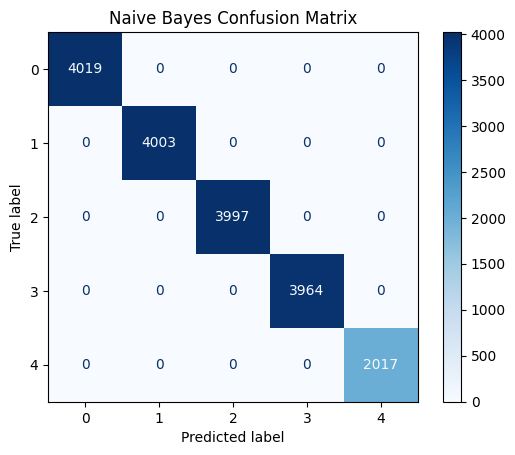


========== Decision Tree ==========
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4019
           1       1.00      1.00      1.00      4003
           2       1.00      1.00      1.00      3997
           3       1.00      1.00      1.00      3964
           4       1.00      1.00      1.00      2017

    accuracy                           1.00     18000
   macro avg       1.00      1.00      1.00     18000
weighted avg       1.00      1.00      1.00     18000



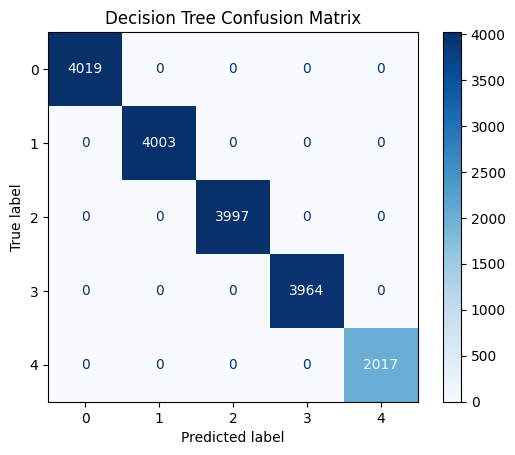


========== Gradient Boosting ==========
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4019
           1       1.00      1.00      1.00      4003
           2       1.00      1.00      1.00      3997
           3       1.00      1.00      1.00      3964
           4       1.00      1.00      1.00      2017

    accuracy                           1.00     18000
   macro avg       1.00      1.00      1.00     18000
weighted avg       1.00      1.00      1.00     18000



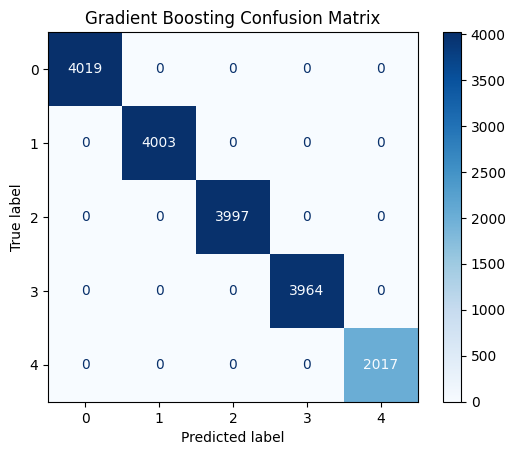


========== Extra Trees ==========
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4019
           1       1.00      1.00      1.00      4003
           2       1.00      1.00      1.00      3997
           3       1.00      1.00      1.00      3964
           4       1.00      1.00      1.00      2017

    accuracy                           1.00     18000
   macro avg       1.00      1.00      1.00     18000
weighted avg       1.00      1.00      1.00     18000



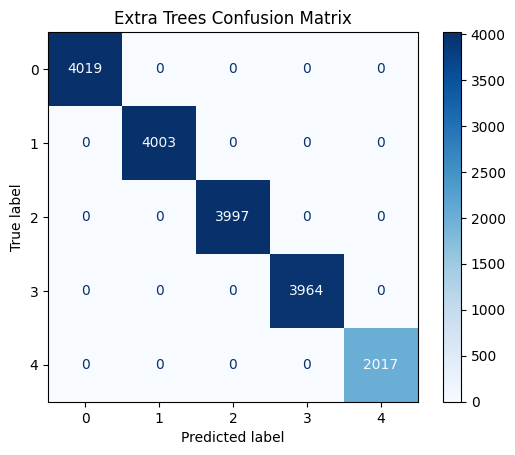


========== MLP Neural Net ==========
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4019
           1       1.00      1.00      1.00      4003
           2       1.00      1.00      1.00      3997
           3       1.00      1.00      1.00      3964
           4       1.00      1.00      1.00      2017

    accuracy                           1.00     18000
   macro avg       1.00      1.00      1.00     18000
weighted avg       1.00      1.00      1.00     18000



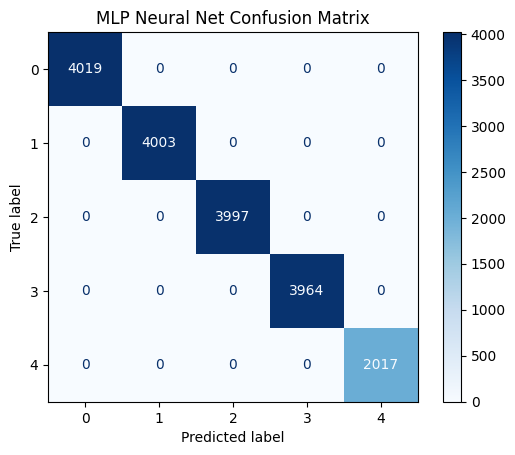

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# === Prepare features and labels ===
# Drop cluster columns to get features
X = df_final.drop(columns=['cluster_kmeans', 'cluster_agglo'], errors='ignore')

# Target labels (choose clustering you want to predict)
y = df_final['cluster_kmeans']

# === Train/Test split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# === Define models with pipelines for scaling where needed ===
models = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(max_iter=1000))
    ]),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', SVC(probability=True))
    ]),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', KNeighborsClassifier(n_neighbors=5))
    ]),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'MLP Neural Net': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', MLPClassifier(max_iter=300))
    ])
}

# === Train, predict and evaluate ===
for name, model in models.items():
    print(f"\n{'='*10} {name} {'='*10}")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, preds))

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.show()


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np
import os

# === Feature scaling for deep learning ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensure labels are numpy arrays
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

# [10] Build improved MLP model
mlp = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(len(np.unique(y_train_np)), activation='softmax')
])

mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# [11] Callbacks for early stopping and model checkpointing
if not os.path.exists("models"):
    os.makedirs("models")

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint("models/best_mlp.h5", monitor='val_loss', save_best_only=True)

# [12] Train the MLP
history = mlp.fit(
    X_train_scaled, y_train_np,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# [13] Predict & evaluate
mlp_preds = np.argmax(mlp.predict(X_test_scaled), axis=1)

print("\nImproved MLP Classification Report:")
print(classification_report(y_test_np, mlp_preds))


2025-06-24 13:24:35.004850: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750771475.238778      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750771475.306827      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-24 13:24:50.181752: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


263/263 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7236 - loss: 0.7766 - val_accuracy: 1.0000 - val_loss: 0.0205
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9950 - loss: 0.0269 - val_accuracy: 1.0000 - val_loss: 2.7040e-04
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9992 - loss: 0.0086 - val_accuracy: 1.0000 - val_loss: 7.9131e-05
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9991 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 3.7831e-05
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9996 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 1.7542e-05
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9998 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 1.1836e-05
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9999 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 8.1637e-06
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9998 - loss: 0.0012 - val

In [5]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import gc

# Fix random seeds
np.random.seed(42)
tf.random.set_seed(42)

# Convert X and y to numpy arrays
X_np = X.values if hasattr(X, "values") else X
y_np = y.values if hasattr(y, "values") else y

n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

n_classes = len(np.unique(y_np))
rf_oof = np.zeros((X_np.shape[0], n_classes))
xgb_oof = np.zeros_like(rf_oof)
mlp_oof = np.zeros_like(rf_oof)

for train_idx, valid_idx in skf.split(X_np, y_np):
    X_train_fold, X_valid_fold = X_np[train_idx], X_np[valid_idx]
    y_train_fold, y_valid_fold = y_np[train_idx], y_np[valid_idx]
    
    # Scale for MLP
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_fold)
    X_valid_scaled = scaler.transform(X_valid_fold)

    # Random Forest
    rf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
    rf.fit(X_train_fold, y_train_fold)
    rf_oof[valid_idx] = rf.predict_proba(X_valid_fold)

    # XGBoost
    xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6,
                        use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    xgb.fit(X_train_fold, y_train_fold)
    xgb_oof[valid_idx] = xgb.predict_proba(X_valid_fold)

    # MLP
    mlp_fold = Sequential([
        Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        BatchNormalization(),
        Dropout(0.4),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(n_classes, activation='softmax')
    ])
    mlp_fold.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    mlp_fold.fit(X_train_scaled, y_train_fold, 
                 epochs=25, batch_size=64, verbose=0, 
                 validation_data=(X_valid_scaled, y_valid_fold),
                 callbacks=[early_stop])
    
    mlp_oof[valid_idx] = mlp_fold.predict(X_valid_scaled)

    tf.keras.backend.clear_session()
    gc.collect()

# Meta features and targets
meta_X = np.hstack([rf_oof, xgb_oof, mlp_oof])
meta_y = y_np

# Train/test split for meta-model
X_meta_train, X_meta_test, y_meta_train, y_meta_test = train_test_split(
    meta_X, meta_y, test_size=0.3, random_state=42, stratify=meta_y
)

# Meta-classifier
meta_clf = LogisticRegression(max_iter=2000)
meta_clf.fit(X_meta_train, y_meta_train)

# Scale full train/test for final MLP
scaler_full = StandardScaler()
X_train_scaled = scaler_full.fit_transform(X_train)
X_test_scaled = scaler_full.transform(X_test)

# Final base models training
rf_final = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42).fit(X_train, y_train)
xgb_final = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=6,
                          use_label_encoder=False, eval_metric='mlogloss', random_state=42).fit(X_train, y_train)

mlp_final = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(n_classes, activation='softmax')
])
mlp_final.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stop_final = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
mlp_final.fit(X_train_scaled, y_train, epochs=25, batch_size=64, verbose=1, validation_split=0.2, callbacks=[early_stop_final])

# Predict test probs for meta model
rf_test_probs = rf_final.predict_proba(X_test)
xgb_test_probs = xgb_final.predict_proba(X_test)
mlp_test_probs = mlp_final.predict(X_test_scaled)

meta_test_X = np.hstack([rf_test_probs, xgb_test_probs, mlp_test_probs])
meta_preds = meta_clf.predict(meta_test_X)

# Final evaluation
acc = accuracy_score(y_test, meta_preds)
print("\nFinal Stacked Hybrid Model Classification Report:")
print(classification_report(y_test, meta_preds))
print(f"Final Hybrid Model Accuracy: {acc*100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


525/525 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8630 - loss: 0.3869 - val_accuracy: 1.0000 - val_loss: 2.2014e-04
Epoch 2/25
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9982 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 1.9510e-05
Epoch 3/25
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9991 - loss: 0.0036 - val_accuracy: 1.0000 - val_loss: 8.1151e-06
Epoch 4/25
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9999 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 3.3716e-06
Epoch 5/25
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9996 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 2.1948e-05
Epoch 6/25
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9987 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 1.4246e-06
Epoch 7/25
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9998 - loss: 6.9115e-04 - val_accuracy: 1.0000 - val_loss: 6.1525e-07
Epoch 8/25
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9999 - loss: 2.67


Stacked Model Logistic Regression 10-fold F1 (macro): 1.0000 ± 0.0000
Stacked Model ROC-AUC (OVR): 1.0000
Stacked Model Accuracy: 1.0000
Stacked Model RMSE: 0.0000
Stacked Model MAE: 0.0000
Stacked Model Confusion Matrix:
 [[4019    0    0    0    0]
 [   0 4003    0    0    0]
 [   0    0 3997    0    0]
 [   0    0    0 3964    0]
 [   0    0    0    0 2017]]


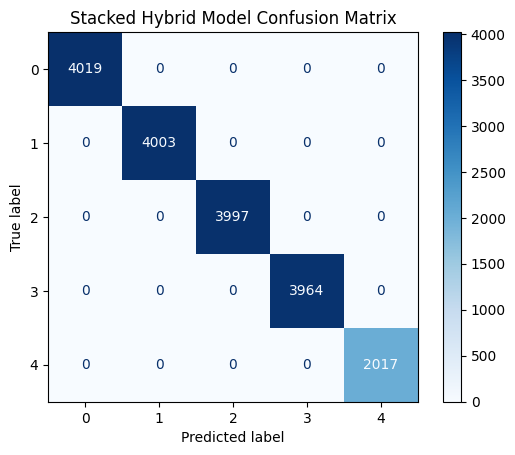

In [6]:
from sklearn.metrics import (
    roc_auc_score,
    mean_squared_error,
    mean_absolute_error,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- 10-fold CV on meta-classifier (stacked Logistic Regression) ---
cv_scores = cross_val_score(meta_clf, meta_X, meta_y, cv=10, scoring='f1_macro')
print(f"\nStacked Model Logistic Regression 10-fold F1 (macro): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# --- ROC-AUC on stacked model test predictions ---
# Convert y_test to one-hot encoding for multiclass ROC-AUC
y_test_ohe = pd.get_dummies(y_test)

# For ROC-AUC, get meta-classifier predicted probabilities
meta_test_probs = meta_clf.predict_proba(meta_test_X)
roc_auc = roc_auc_score(y_test_ohe, meta_test_probs, multi_class='ovr')
print(f"Stacked Model ROC-AUC (OVR): {roc_auc:.4f}")

# --- Regression-style evaluation on stacked predictions ---
print(f"Stacked Model Accuracy: {accuracy_score(y_test, meta_preds):.4f}")
print(f"Stacked Model RMSE: {np.sqrt(mean_squared_error(y_test, meta_preds)):.4f}")
print(f"Stacked Model MAE: {mean_absolute_error(y_test, meta_preds):.4f}")

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, meta_preds)
print("Stacked Model Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Stacked Hybrid Model Confusion Matrix")
plt.show()